<a href="https://colab.research.google.com/github/shahlafakouri/ShahlaFakouri2023/blob/main/CNNLSTMmansi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# General pipeline to solve any problem with Machine Learning/Deep Learning approach

![image](https://drive.google.com/uc?id=1DBnjZWkLQXhJMC-9zZfxM01nVEG6aSOc)



In [ ]:
#
#
# CNN-LSTM Hybrid Model 
# Code by : Manasi and Shahla
#
#

# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# reading data file
df = pd.read_csv('/content/gdrive/My Drive/Data/WELFake_Dataset.csv')


In [ ]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Defining column titles

df.columns = ["id","title","text","label"]

In [ ]:
df.head(10)

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Preprocessing and Feature Extraction Phase

In [ ]:
# remove unwanted column entries (id and title)

df.drop(labels=['id','title'], axis='columns', inplace=True)


In [ ]:
df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

In [ ]:
#Removing null values from text

df.dropna(subset = ["text"], inplace=True)


In [ ]:
# Defining function to remove stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [ ]:
#Call to remove stopwords

df['text'] = df.apply(stopword_removal, axis=1)

In [ ]:
# Case folding.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-15-a515f5880836>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
# assign text samples and their labels and print no of rows in 'texts'

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 72095 texts.


In [ ]:
# Fill NaN values with "" in the texts column

texts = texts.fillna("")

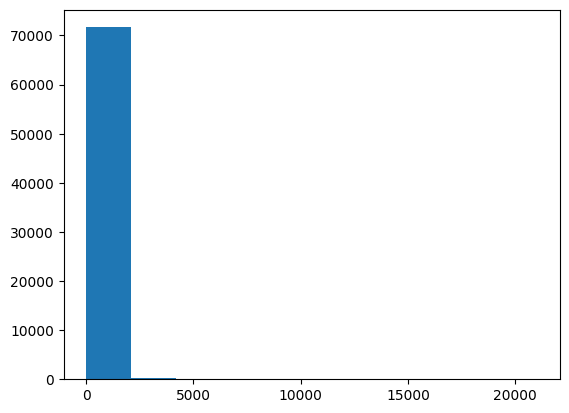

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [ ]:
MAX_SEQUENCE_LENGTH = 600
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 512
TEST_SPLIT = 0.2

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)
# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)

# calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
# padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 242766 unique tokens.
Shape of data tensor: (72095, 600)
Shape of label tensor: (72095,)


# Data Curation Phase

In [ ]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, 
                                        labels, 
                                        test_size=0.1)

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1)



In [ ]:
x_train.shape

(58396, 600)

In [ ]:
x_val.shape

(6489, 600)

In [ ]:
x_test.shape

(7210, 600)

# Model Building Phase

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

dropout1 = 0.4
dropout2 = 0.5
num_classes = 1

model = Sequential(
    [
        # Part 1: Word and sequence processing
        layers.Embedding(242766,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False)
        ])

model.add(Conv1D(64, 9, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(dropout1))

model.add(Conv1D(128, 9, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(dropout1))
model.add(Flatten())

# Part 2: LSTM layer
layers.LSTM(64),
layers.LSTM(128),

# Part 3: Classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout2))
# Add batch normalization layer
model.add(BatchNormalization())  
model.add(Dense(num_classes, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# printing summary of model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 512)          124296192 
                                                                 
 conv1d_1 (Conv1D)           (None, 592, 128)          589952    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 148, 128)         0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 148, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 140, 128)          147584    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 35, 128)          0         
 1D)                                                  

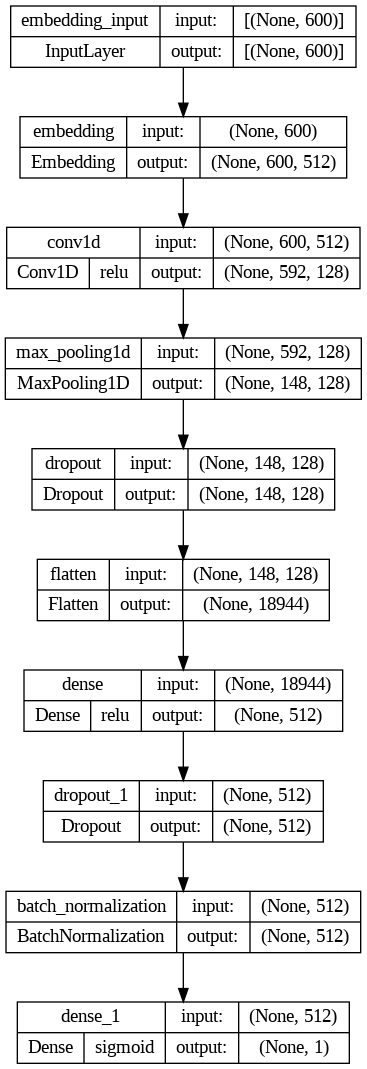

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

# Model Training Phase

In [ ]:
# train the model with batch size of 16 and 45 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)

Epoch 1/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.4308 - accuracy: 0.7869 - val_loss: 0.2163 - val_accuracy: 0.9155
Epoch 2/20
3650/3650 [==============================] - 40s 11ms/step - loss: 0.2372 - accuracy: 0.9065 - val_loss: 0.1607 - val_accuracy: 0.9373
Epoch 3/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.1906 - accuracy: 0.9275 - val_loss: 0.1366 - val_accuracy: 0.9491
Epoch 4/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.1596 - accuracy: 0.9405 - val_loss: 0.2341 - val_accuracy: 0.9199
Epoch 5/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.1398 - accuracy: 0.9483 - val_loss: 0.1175 - val_accuracy: 0.9542
Epoch 6/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.1218 - accuracy: 0.9556 - val_loss: 0.1139 - val_accuracy: 0.9544
Epoch 7/20
3650/3650 [==============================] - 41s 11ms/step - loss: 0.1078 - accuracy: 0.9601 - val_loss: 0.1522 -

In [ ]:
!pip install keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 16)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


11910662672
FLOPS: 11.9 G 


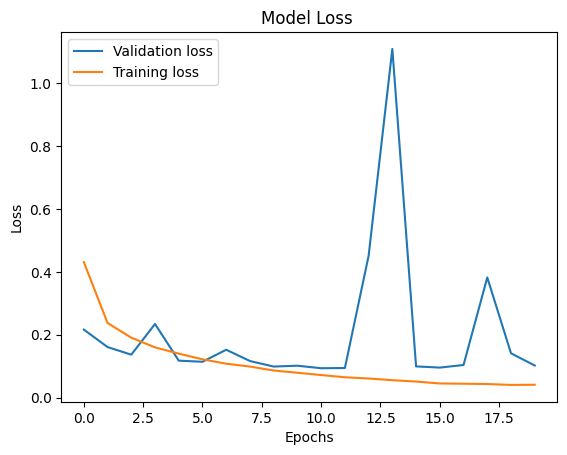

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

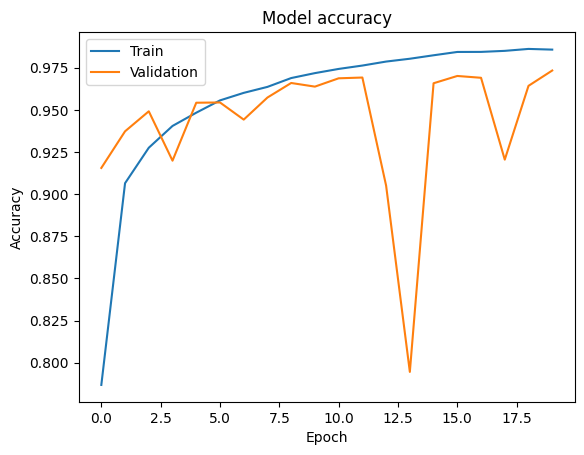

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing phase

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
226/226 [==============================] - 2s 7ms/step - loss: 0.1004 - accuracy: 0.9716
test loss, test acc: [0.10043161362409592, 0.9715672731399536]


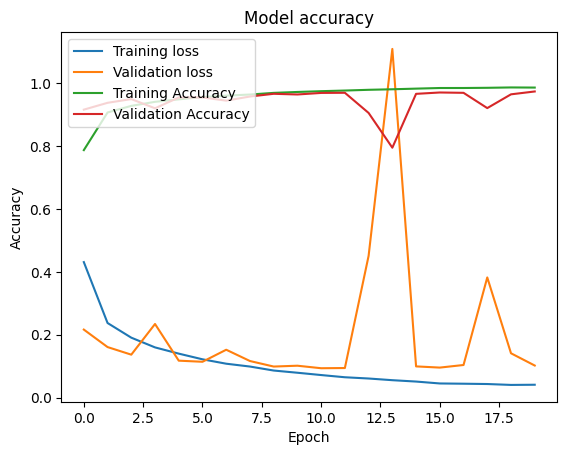

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

# Evaluation Phase

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc

226/226 [==============================] - 2s 8ms/step


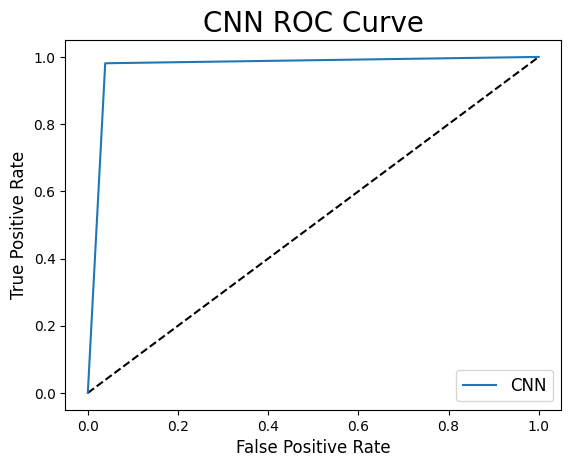

Training Accuracy: 99.98%
Testing Accuracy: 97.16%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3498
           1       0.96      0.98      0.97      3712

    accuracy                           0.97      7210
   macro avg       0.97      0.97      0.97      7210
weighted avg       0.97      0.97      0.97      7210

AUC score 0.971274379694801
Total time required for testing 18.27624225616455


In [ ]:
# Model evaluation
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)